In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Step 1: Load the grayscale image
image_path = 'image.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

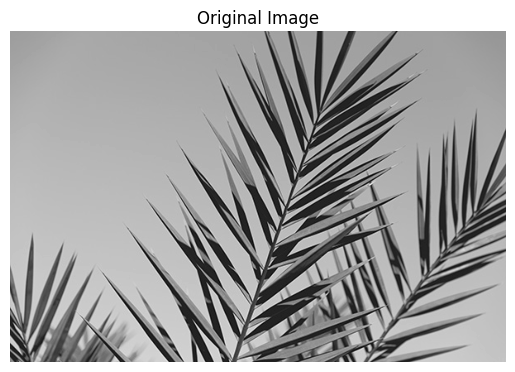

In [7]:
if image is None:
    print("Error: Could not load the image.")
else:
    # Display the original image
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

In [8]:
# Step 2: Smoothing (Gaussian Blur)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 3: Gradient Calculation (Sobel Operator)
# Sobel X and Y gradients
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate gradient magnitude and direction
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)
gradient_direction = cv2.phase(sobel_x, sobel_y, angleInDegrees=True)

In [9]:
# Step 4: Non-Maximum Suppression
def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    output = np.zeros_like(magnitude)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            angle = direction[i, j]
            
            if (angle >= 0 and angle < 45) or (angle >= 180 and angle < 225):
                neighbor1 = magnitude[i, j-1]
                neighbor2 = magnitude[i, j+1]
            elif (angle >= 45 and angle < 90) or (angle >= 225 and angle < 270):
                neighbor1 = magnitude[i-1, j+1]
                neighbor2 = magnitude[i+1, j-1]
            elif (angle >= 90 and angle < 135) or (angle >= 270 and angle < 315):
                neighbor1 = magnitude[i-1, j]
                neighbor2 = magnitude[i+1, j]
            else:
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]
                
            # Non-maximum suppression
            if magnitude[i, j] >= max(neighbor1, neighbor2):
                output[i, j] = magnitude[i, j]
            else:
                output[i, j] = 0
    
    return output

suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_direction)


In [10]:
# Step 5: Edge Thresholding (Canny edge detection)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(smoothed_image, low_threshold, high_threshold)

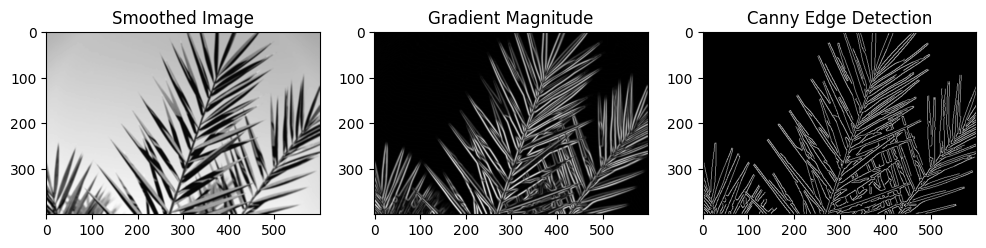

In [11]:
# Step 6: Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')

plt.show()